In [48]:
!pip install gymnasium[box2d] stable-baselines3 opencv-python imageio

Defaulting to user installation because normal site-packages is not writeable


In [49]:
!pip install stable-baselines3[extra]
!pip install gymnasium[box2d]
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [50]:
import gymnasium as gym
from gymnasium.wrappers import ResizeObservation
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecTransposeImage, VecMonitor, VecNormalize, VecTransposeImage
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import VecEnvWrapper
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [51]:
class FloatActionWrapper(gym.ActionWrapper):
    def action(self, action):
        return np.array(action, dtype=np.float64)
def make_env():
    def _init():
        env = gym.make("CarRacing-v2", render_mode="rgb_array")
        env = FloatActionWrapper(env)
        env = Monitor(env)
        return env
    return _init

In [53]:
env = DummyVecEnv([make_env()]) 

In [63]:
obs = env.reset()
print("Type of obs:", type(obs))
print("Observation shape:", obs[0].shape)

Type of obs: <class 'numpy.ndarray'>
Observation shape: (96, 96, 3)


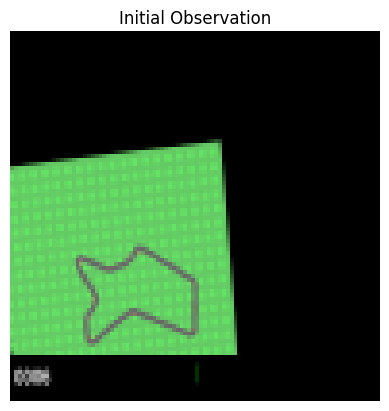

In [64]:
plt.imshow(obs[0])  # Already (H, W, C)
plt.title("Initial Observation")
plt.axis('off')
plt.show()

In [65]:
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import CheckpointCallback

# Create PPO model using CNN policy (for image input)
model = PPO(
    policy="CnnPolicy",
    env=env,
    verbose=1,
    tensorboard_log="./ppo_carracing_tensorboard/"
)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [66]:
checkpoint_callback = CheckpointCallback(
    save_freq=10000,
    save_path="./ppo_carracing_checkpoints/",
    name_prefix="ppo_carracing"
)

In [67]:
model.learn(
    total_timesteps=100_000,  # You can increase later to 1M+
    callback=checkpoint_callback
)

Logging to ./ppo_carracing_tensorboard/PPO_10
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -54.8    |
| time/              |          |
|    fps             | 65       |
|    iterations      | 1        |
|    time_elapsed    | 31       |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -53.4        |
| time/                   |              |
|    fps                  | 54           |
|    iterations           | 2            |
|    time_elapsed         | 74           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0059324163 |
|    clip_fraction        | 0.0665       |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.24        |
|    explain

In [70]:
!pip install moviepy

from stable_baselines3.common.vec_env import DummyVecEnv, VecVideoRecorder, VecTransposeImage
import os

video_folder = "./ppo_carracing_videos/"
video_length = 1000  # number of timesteps in the video

# Create the folder to store videos
os.makedirs(video_folder, exist_ok=True)

# Create a new wrapped environment for video recording
env = DummyVecEnv([make_env()])
env = VecTransposeImage(env)
env = VecVideoRecorder(
    env,
    video_folder,
    record_video_trigger=lambda x: x == 0,  # record at first episode
    video_length=video_length,
    name_prefix="ppo_carracing_agent"
)

# Run one episode and record the agent
obs = env.reset()
for _ in range(video_length):
    action, _ = model.predict(obs, deterministic=True)
    obs, _, done, _ = env.step(action)
    if done:
        obs = env.reset()

env.close()

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 KB 3.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 12.2 MB/s eta 0:00:0000:0100:01
Saving video to /mnt/e/Users/HP/.vscode/SOC_2025/ppo_carracing_videos/ppo_carracing_agent-step-0-to-step-1000.mp4
MoviePy - Building video /mnt/e/Users/HP/.vscode/SOC_2025/ppo_carracing_videos/ppo_carracing_agent-step-0-to-step-1000.mp4.
MoviePy - Writing video /mnt/e/Users/HP/.vscode/SOC_2025/ppo_carracing_videos/ppo_carracing_agent-step-0-to-step-1000.mp4



MoviePy - Done !
MoviePy - video ready /mnt/e/Users/HP/.vscode/SOC_2025/ppo_carracing_videos/ppo_carracing_agent-step-0-to-step-1000.mp4
